In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm for the progress bar
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from 'c:\\Users\\marwi\\OneDrive - Universität Potsdam\\Intro_to_ML\\Assignment 02\\uib-machine-learning\\assignment-2\\src\\util.py'>

In [3]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [4]:
# Define the desired maximum instances per class
max_instances_per_class = 1000

# Initialize lists to store downsampled data
downsampled_X = []
downsampled_y = []
# Iterate through unique classes
unique_classes = np.unique(y)
for class_label in unique_classes:
    # Get indices of instances for this class
    class_indices = np.where(y == class_label)[0]

    # Randomly select up to max_instances_per_class instances for this class
    if len(class_indices) > max_instances_per_class:
        selected_indices = np.random.choice(class_indices, max_instances_per_class, replace=False)
    else:
        selected_indices = class_indices

    # Append the selected instances to the downsampled data
    downsampled_X.extend(X[selected_indices])
    downsampled_y.extend(y[selected_indices])

# Convert the downsampled data to NumPy arrays
downsampled_X = np.array(downsampled_X)
downsampled_y = np.array(downsampled_y)

# Shuffle the downsampled data
shuffle_indices = np.random.permutation(len(downsampled_X))
downsampled_X = downsampled_X[shuffle_indices]
downsampled_y = downsampled_y[shuffle_indices]

# Print the counts for each class in the downsampled dataset
unique_classes_downsampled, class_counts_downsampled = np.unique(downsampled_y, return_counts=True)
#for class_label, class_count in zip(unique_classes_downsampled, class_counts_downsampled):
   # print(f"Class {class_label}: {class_count} instances in the downsampled dataset.")

In [5]:
# Inspection of Label Occurences for Dataset inspection
unique_values, counts = np.unique(y, return_counts=True)
expected_occurence =  y.size / counts.size 
print('Expected average occurence of one symbol: ' + str(int(expected_occurence)) + " | in %: " + str("{:.1%}".format(float(expected_occurence / y.size))))
# Print the results
for value, count in zip(unique_values, counts):
    if value < 10:
        percentage_occurence = "{:.1%}".format(float(count / y.size))
        print(f"{value} occurs {count} times" + " | Average: " + percentage_occurence)
    elif (value >= 10) & (value < 16):
        percentage_occurence = "{:.1%}".format(float(count / y.size))
        char_value = chr(ord('a') + value - 10)  # Convert value to corresponding ASCII character
        print(f"{char_value} occurs {count} times" " | Average: " + percentage_occurence)
    else:
        print("Empty occurs " + str(count) + " times" + " | Average: " + percentage_occurence)

Expected average occurence of one symbol: 6341 | in %: 5.9%
0 occurs 7407 times | Average: 6.9%
1 occurs 7642 times | Average: 7.1%
2 occurs 7371 times | Average: 6.8%
3 occurs 7397 times | Average: 6.9%
4 occurs 7397 times | Average: 6.9%
5 occurs 7220 times | Average: 6.7%
6 occurs 7382 times | Average: 6.8%
7 occurs 7451 times | Average: 6.9%
8 occurs 7327 times | Average: 6.8%
9 occurs 7374 times | Average: 6.8%
a occurs 6022 times | Average: 5.6%
b occurs 3878 times | Average: 3.6%
c occurs 6198 times | Average: 5.7%
d occurs 4562 times | Average: 4.2%
e occurs 1337 times | Average: 1.2%
f occurs 6159 times | Average: 5.7%
Empty occurs 5678 times | Average: 5.7%


In [7]:
# Sample a smaller portion of the data (e.g., 10,000 samples)
# Ideal sample size Sample linear model -> sample_size = 8700 -> 88,5%
# Ideal sample size Sample linear model (balanced data set) -> sample_size = 1000 -> 84-87%
sample_size = 10000
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, train_size=sample_size, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Finding best hyperparameter combination for Random Forest Model with GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
randomForest_model = RandomForestClassifier()
# Performing a grid search in order to find the best combination of hyperparameters for model outcome
grid_search = GridSearchCV(estimator=randomForest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)



Random Forest Validation Accuracy:  0.882


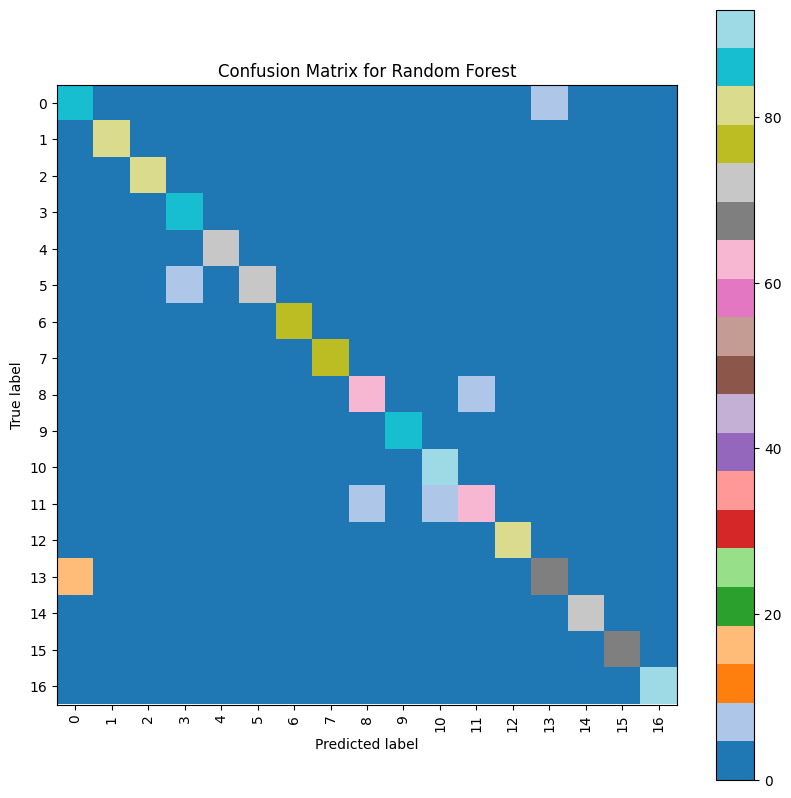

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on validation data
rf_prediction = rf_model.predict(X_val)

# Evaluate the model
rf_val_accuracy = accuracy_score(y_val, rf_prediction)
rf_val_classification_report = classification_report(y_val, rf_prediction)

# Print validation evaluation results for Random Forest
print("Random Forest Validation Accuracy: ", rf_val_accuracy)
#print("Random Forest Validation Classification Report: ")
#print(rf_val_classification_report)

# Create a confusion matrix for Random Forest
rf_cm = metrics.confusion_matrix(y_val, rf_prediction)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(10, 10))
labels_rf = np.unique(y_val)
tick_marks_rf = np.arange(len(labels_rf))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(rf_cm, interpolation='nearest', cmap=plt.cm.tab20)
plt.colorbar()
_ = plt.xticks(tick_marks_rf, labels_rf, rotation=90)
_ = plt.yticks(tick_marks_rf, labels_rf)
plt.title('Confusion Matrix for Random Forest')
plt.savefig("confusion_matrix_rf.png", dpi=300)
plt.show()
